## Read in the data in wide format

In [177]:
from Datapreprocessing import DataProcessor, TrainModel, evaluate_regression_model
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fill in the missing values

In [127]:
train_data = pd.read_csv('train_data_wide.csv')

In [128]:
# Replace missing BMI values with 0
train_data['bmi'] = train_data['bmi'].fillna(0)

# Replace missing values in categorical columns with "not recorded"
categorical_columns = ['ethnicity', 'race', 'parent_1_education', 'parent_2_education']
train_data[categorical_columns] = train_data[categorical_columns].fillna("not recorded")

## Fit the linear regression model

Using direct model (no encoding needed)


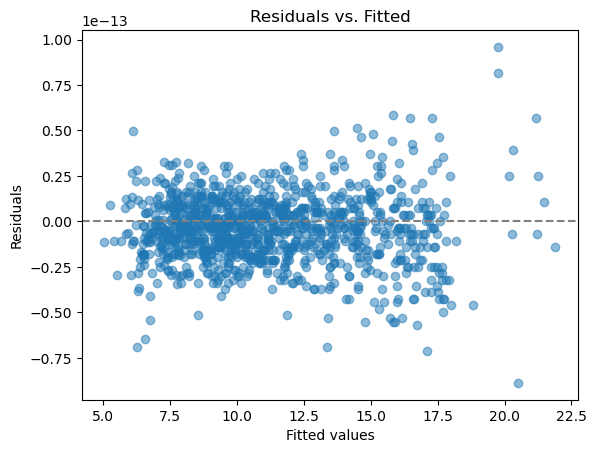

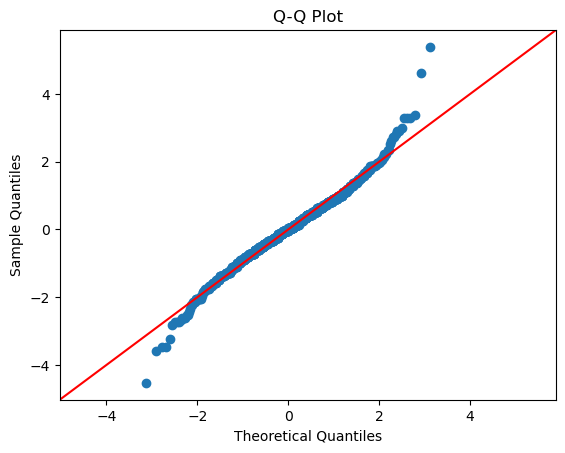


Cross-Validation Results:
Train R² Scores: [1. 1. 1. 1. 1.]
Mean Train R² Score: 1.0000
Test R² Scores: [0.58182988 0.58807993 0.61371797 0.57568561 0.51944486]
Mean Test R² Score: 0.5758
Test MSE Scores: [4.19206491 3.83296039 4.03925791 4.68833666 5.43818445]
Mean Test MSE: 4.4382


In [129]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
import numpy as np

X = train_data.drop(['age', 'participant_id', 'ethnicity', 'race', 'handedness', 
                     'parent_1_education', 'parent_2_education', 'sex', 'study_site'], axis=1)  
y = train_data['age']

evaluate_regression_model(X, y)

Using target encoding pipeline


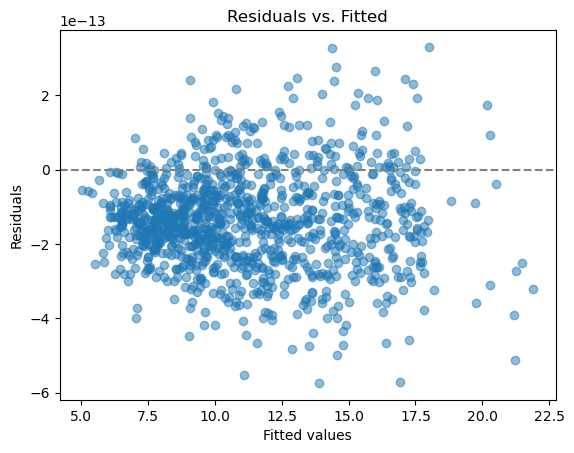

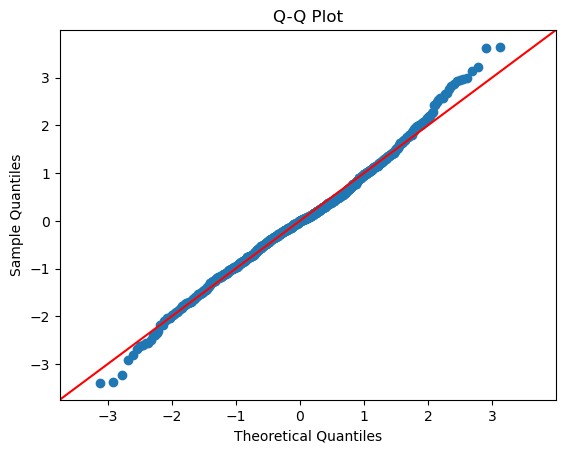


Cross-Validation Results:
Train R² Scores: [1. 1. 1. 1. 1.]
Mean Train R² Score: 1.0000
Test R² Scores: [0.58549926 0.60294436 0.61109846 0.5787358  0.52079393]
Mean Test R² Score: 0.5798
Test MSE Scores: [4.15528009 3.69464526 4.06664946 4.65463449 5.4229177 ]
Mean Test MSE: 4.3988


In [130]:
X = train_data.drop(['age'], axis=1)  
y = train_data['age']

evaluate_regression_model(X, y)

Based on the two linear regression models fitted above, there is serious overfitting problems, but the results showed that adding categorical variables may not bring much improvement to the model performance.

## Select Features

In [131]:
from sklearn.feature_selection import SelectKBest, f_regression

object_columns = train_data.select_dtypes(include=['object']).columns
correlation_features = train_data.drop(columns=object_columns)
target = train_data['age']
selector = SelectKBest(f_regression, k=100)
features_reduced = selector.fit_transform(correlation_features, target)

In [132]:
features_reduced = pd.DataFrame(features_reduced, columns=correlation_features.columns[selector.get_support()])
features_reduced.head()

,corr_4440,corr_6700,corr_6701,corr_6805,corr_7055,corr_7062,corr_7070,corr_7231,corr_7278,corr_7279,...,corr_18761,corr_18763,corr_18869,corr_18897,corr_19391,corr_19392,corr_19422,corr_19796,age,bmi
0,-0.121599,0.155337,0.141229,0.124573,-0.368117,-0.199834,-0.295317,-0.248700,0.258086,0.154537,...,-0.292097,-0.367697,-0.193657,-0.100102,-0.268719,-0.184924,0.133518,0.232407,13.35,19.10
1,-0.047480,0.108901,0.096683,0.117455,-0.125318,-0.032815,-0.298915,0.042610,-0.068114,0.017172,...,-0.156705,-0.422065,-0.207533,0.052250,-0.402520,-0.228050,-0.153885,0.235959,14.62,32.46
2,-0.009281,0.067010,0.032118,0.020547,-0.469052,-0.148011,0.215291,0.111302,-0.051266,0.027710,...,-0.207746,-0.151859,-0.435711,0.092661,0.063883,0.120454,0.051956,0.036671,7.14,15.98
3,0.331472,0.309834,0.122446,0.267139,-0.293554,-0.205999,-0.333704,-0.088601,-0.020188,0.279073,...,-0.023780,-0.337322,-0.097995,0.278202,-0.117643,0.211957,-0.095803,0.323449,13.94,14.92
4,0.252408,0.072247,-0.041780,0.261419,-0.206515,-0.449440,-0.673377,0.132281,-0.273004,0.367468,...,0.091789,-0.238256,0.058237,0.191942,-0.291110,-0.056419,0.138968,0.419641,9.92,18.85


Using direct model (no encoding needed)


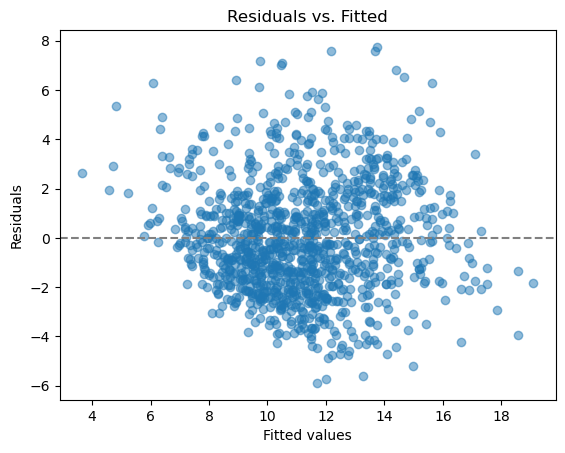

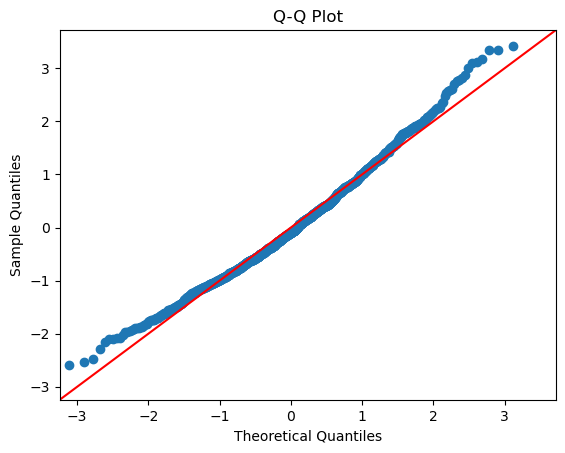


Cross-Validation Results:
Train R² Scores: [0.53108023 0.50991777 0.50846324 0.53110005 0.53125405]
Mean Train R² Score: 0.5224
Test R² Scores: [0.33968693 0.44182166 0.44037982 0.34225105 0.33337477]
Mean Test R² Score: 0.3795
Test MSE Scores: [6.61949547 5.19390924 5.85181303 7.2676029  7.54383965]
Mean Test MSE: 6.4953


In [133]:
X = features_reduced.drop(['age'], axis=1)  
y = features_reduced['age']

evaluate_regression_model(X, y)

## Select Features Using PCA

In [134]:
import category_encoders as ce

X = train_data.drop(['age', 'participant_id'], axis=1)  
y = train_data['age']
encoder = ce.TargetEncoder()
encoder.fit(X, y)
X_encoded = encoder.transform(X)
X_encoded.head()

,corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,corr_10,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.074628,0.673757,0.813541,0.725489,0.823861,0.801859,0.690204,0.450536,0.602295,0.414038,...,19.10,11.131882,11.314095,11.254486,11.059057,11.077816,0.59,-0.15,0.29,-1.60
1,0.167241,0.549381,0.453434,0.132590,0.496156,0.337475,0.506641,0.215110,0.564849,0.303428,...,32.46,11.131882,10.982736,11.254486,11.175368,11.077816,-0.17,0.54,-1.00,-0.87
2,0.197198,0.337779,0.018934,0.580793,0.728406,0.507803,0.470236,0.401553,0.547191,0.515227,...,15.98,11.046714,11.314095,11.254486,11.059057,11.077816,-0.43,-0.25,0.18,0.39
3,0.370992,0.546226,0.659874,0.212565,0.429793,0.352411,0.047157,0.112740,0.012267,0.018085,...,14.92,11.131882,11.314095,11.254486,11.175368,11.077816,-0.33,0.25,-0.31,1.10
4,0.127956,0.415074,0.219740,0.311787,0.650690,0.615524,0.597610,0.334451,0.327396,0.489721,...,18.85,11.046714,11.560893,11.254486,11.381257,11.274087,-1.04,-0.40,-0.53,0.71


In [135]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

# First standardize the data (important for PCA)
X_scaled = StandardScaler().fit_transform(X_encoded)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1))

# Create PCA object without specifying components yet
pca = IncrementalPCA(batch_size=1500)  # Process 500 samples at a time

# Fit the PCA model to your data
pca.fit(X_scaled)

IncrementalPCA(batch_size=1500)

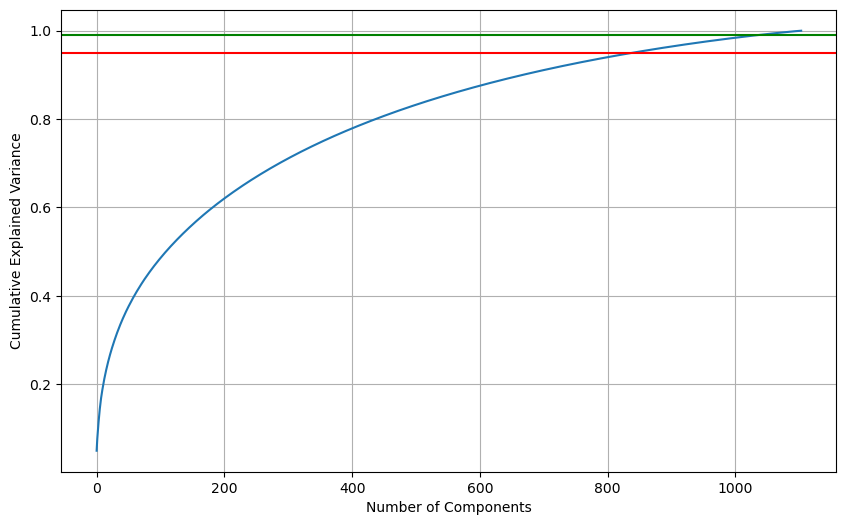

Components needed for 99% variance: 840


In [136]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% line
plt.axhline(y=0.99, color='g', linestyle='-')  # 99% line
plt.grid(True)
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Components needed for 99% variance: {n_components_95}")

In [137]:
X_reduced = pca.transform(X_scaled)[:, :n_components_95]
X_reduced = pd.DataFrame(
    data=X_reduced,
    columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])],
    index=X_scaled.index if hasattr(X_scaled, 'index') else None  # Preserve original index if available
)

# View the result
print(X_reduced.shape)
X_reduced.head()

(1104, 840)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC831,PC832,PC833,PC834,PC835,PC836,PC837,PC838,PC839,PC840
0,-37.068134,-19.582565,35.544210,13.445808,-19.090505,10.379657,-5.581700,-8.923754,27.321164,-8.603528,...,3.237457,2.345626,-2.689035,-1.391718,-3.748583,0.340000,1.171931,-1.645229,-4.355993,1.545033
1,-16.758704,1.568385,-13.399482,26.685071,15.917656,8.755840,9.910632,-5.388729,-21.162011,-1.066427,...,0.149876,2.162482,-1.871367,-1.869846,4.248890,-0.720395,-2.113292,-1.447469,1.340731,-0.480506
2,-8.889134,-11.989003,-14.101080,-15.018634,19.143247,34.273626,9.479018,10.815803,-1.111830,2.543403,...,-2.079910,-0.459527,1.130555,0.469860,-0.165825,1.299294,1.814806,-1.804568,0.239455,1.454267
3,-30.915280,1.171641,11.329445,11.922279,0.081204,14.325648,-4.287194,-14.593914,22.089838,-5.193443,...,6.828278,0.814900,-0.943709,-0.200728,1.130895,-4.094303,0.029580,2.217739,0.337331,-0.867393
4,-29.350947,60.884459,-9.589211,-31.376408,3.002276,-32.680036,23.388874,-18.001697,4.428919,13.123581,...,3.547522,0.190684,-1.767014,-1.273750,-2.616122,-3.112580,0.475397,3.601712,2.619591,4.182409


Text(0, 0.5, 'Frequency')

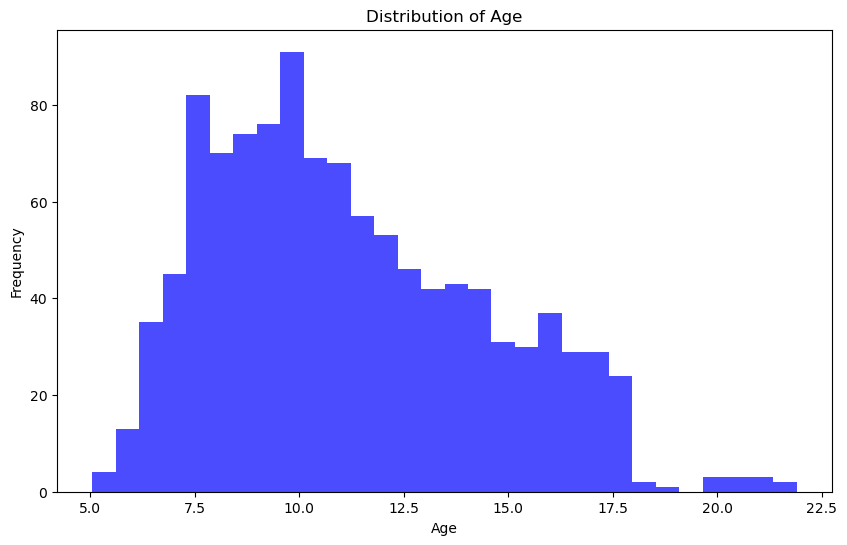

In [138]:
# Plot the distribution of the 'age' variable of train_data
plt.figure(figsize=(10, 6))
plt.hist(train_data['age'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Using direct model (no encoding needed)


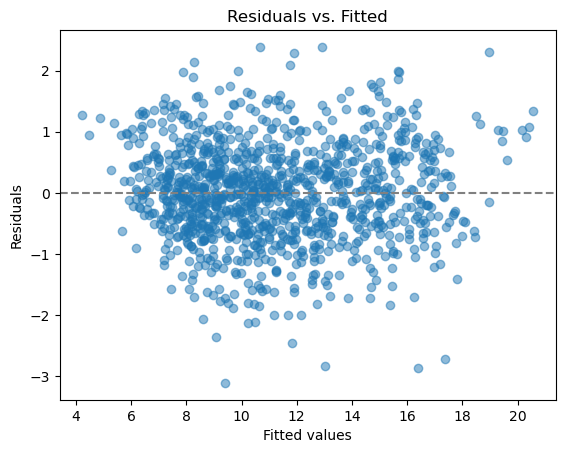

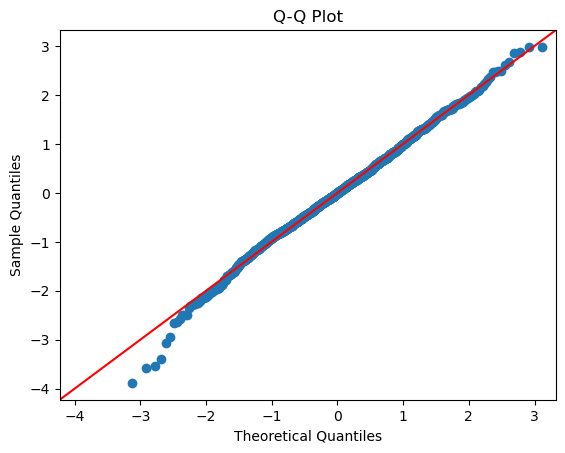


Cross-Validation Results:
Train R² Scores: [0.98814649 0.98702492 0.98928304 0.98619945 0.99221476]
Mean Train R² Score: 0.9886
Test R² Scores: [ -7.86967801  -6.70225223 -10.18207179  -6.19219177  -5.07069905]
Mean Test R² Score: -7.2034
Test MSE Scores: [ 88.91660058  71.67028177 116.92822433  79.46800026  68.6988407 ]
Mean Test MSE: 85.1364


In [139]:
evaluate_regression_model(X_reduced, y)

The testing R^2 showed negative results, which means that the linear regression does not fit well. We should consider ridge or lasso.

Using direct model (no encoding needed)


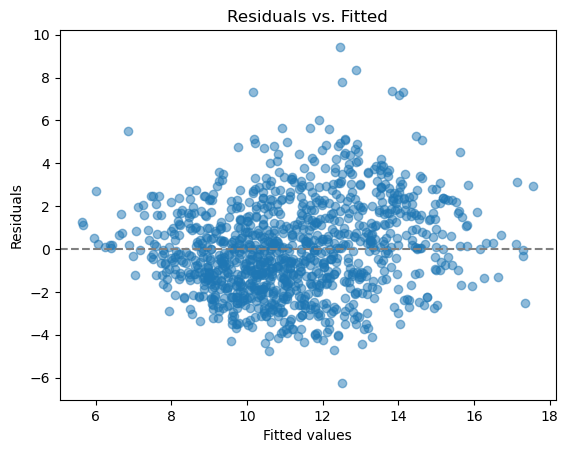

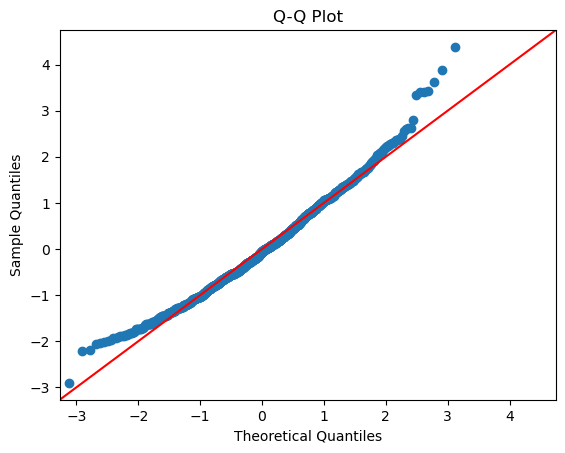


Cross-Validation Results:
Train R² Scores: [0.56402127 0.56937606 0.55271682 0.57064099 0.57061142]
Mean Train R² Score: 0.5655
Test R² Scores: [0.49617257 0.48269421 0.54867526 0.51186744 0.49300592]
Mean Test R² Score: 0.5065
Test MSE Scores: [5.05076088 4.81358578 4.7193938  5.39347669 5.73737974]
Mean Test MSE: 5.1429


In [140]:
from sklearn.linear_model import Lasso

evaluate_regression_model(X_reduced, y, model_type=Lasso)

In [141]:
lasso = TrainModel(random_state=724)
metrics, model = lasso.run(X_reduced, y, trainlasso=True, train_xgb=False)

Best alpha value: 0.29470517025518095

--- Model Evaluation Results ---
Lasso - R² Train: 0.7678, R² Test: 0.6035, MSE Test: 3.9752


Let's try hypertuned XGBoost model and see if the results improved.

In [142]:
# xgb = TrainModel(random_state=724)
# metrics, model = xgb.run(X_reduced, y)

In [143]:
# from Datapreprocessing import interpret_xgboost_with_shap
# interpret_xgboost_with_shap(model, X_reduced)

## Try other models

### CPM

In [144]:
X = train_data.drop(['age', 'participant_id', 'ethnicity', 'race', 'handedness', 
                     'parent_1_education', 'parent_2_education', 'sex', 'study_site',
                     'bmi', 'p_factor_fs', 'internalizing_fs', 'externalizing_fs',
                     'attention_fs'], axis=1).values
y = train_data['age'].values

In [145]:
from Datapreprocessing import CPMTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score

# X: your (1104 × 19900) corr-matrix array, y: age vector
pipeline = Pipeline([
    ('cpm',    CPMTransformer(p_thresh=0.01)),
    ('reg',    Ridge(alpha=1.0))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    pipeline, X, y,
    cv=kf,
    scoring='r2',
    n_jobs=1
)

print("Fold R² scores:", np.round(scores, 3))
print("Mean CV R²:    ", np.round(scores.mean(), 3))

Fold R² scores: [0.361 0.319 0.295 0.42  0.303]
Mean CV R²:     0.34


In [146]:
X.shape

(1104, 19900)

### PLS + kernel ridge regression

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.cross_decomposition import PLSRegression

class PLS2(PLSRegression):
    """A PLS that in fit_transform only returns the X-scores."""
    def fit_transform(self, X, y=None, **fit_params):
        # 1) fit on (X,y)
        super().fit(X, y, **fit_params)
        # 2) return ONLY the X projections
        return super().transform(X)


inner_kf = KFold(5, shuffle=True, random_state=1)
outer_kf = KFold(5, shuffle=True, random_state=2)

pipe_pls_kr = Pipeline([
    ('scale', StandardScaler()),
    ('pls',   PLS2()),         # reduce to n_components first
    ('kr',    KernelRidge())
])

param_grid_pls_kr = {
    'pls__n_components': [20, 50, 100],
    'kr__kernel':         ['rbf'],
    'kr__alpha':          [0.1, 1.0, 10.0],
    'kr__gamma':          [1e-3, 1e-2]
}

grid_pls_kr = GridSearchCV(pipe_pls_kr, param_grid_pls_kr, cv=inner_kf, scoring='r2')
scores_pls_kr = cross_val_score(grid_pls_kr, X, y, cv=outer_kf, scoring='r2', n_jobs=1)

print("PLS→KernelRidge Nested CV R²:", scores_pls_kr.mean(), "±", scores_pls_kr.std())

PLS→KernelRidge Nested CV R²: -0.3145340391607051 ± 0.31149901117252576


## Deep Learning Neural Network

### GNN

In [148]:
df = train_data.drop(['participant_id', 'ethnicity', 'race', 'handedness', 
                     'parent_1_education', 'parent_2_education', 'sex', 'study_site',
                     'bmi', 'p_factor_fs', 'internalizing_fs', 'externalizing_fs',
                     'attention_fs'], axis=1)

In [149]:
df.head()

,corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,corr_10,...,corr_19892,corr_19893,corr_19894,corr_19895,corr_19896,corr_19897,corr_19898,corr_19899,corr_19900,age
0,0.074628,0.673757,0.813541,0.725489,0.823861,0.801859,0.690204,0.450536,0.602295,0.414038,...,-0.384692,0.144188,0.028936,0.459860,0.034850,-0.013038,0.136324,0.307616,0.651800,13.35
1,0.167241,0.549381,0.453434,0.132590,0.496156,0.337475,0.506641,0.215110,0.564849,0.303428,...,-0.218310,0.121466,0.385125,0.238837,0.259410,0.295100,0.173912,0.146515,0.745695,14.62
2,0.197198,0.337779,0.018934,0.580793,0.728406,0.507803,0.470236,0.401553,0.547191,0.515227,...,-0.275289,-0.128840,-0.127517,0.204607,-0.053665,0.014747,0.386666,0.101631,0.392795,7.14
3,0.370992,0.546226,0.659874,0.212565,0.429793,0.352411,0.047157,0.112740,0.012267,0.018085,...,-0.024348,0.023625,0.071900,0.419424,0.463888,0.406361,0.552444,0.491682,0.761957,13.94
4,0.127956,0.415074,0.219740,0.311787,0.650690,0.615524,0.597610,0.334451,0.327396,0.489721,...,0.226518,0.110955,0.165357,0.666903,0.313224,0.407230,0.393838,0.608498,0.732935,9.92


#### Create adjacency matrix for GNN use

In [206]:
from DeepLearning import make_graph
from torch_geometric.data import DataLoader
import torch

n_nodes       = 200                   # because 200*199/2 == 19900 edges
edge_thresh   = 0.1                   # only keep |corr| > 0.2
hidden_dim    = 16                    # small hidden size
batch_size    = 32
lr            = 1e-4
weight_decay  = 1e-4
num_epochs    = 50

# assume `df` is your DataFrame with corr_1…corr_19900 plus `age`
graphs = [
    make_graph(row.iloc[:19900].values, row.age, n_nodes, edge_thresh)
    for _, row in df.iterrows()
]

# split into train/val
n_train = int(len(graphs)*0.8)
train_ds, val_ds = graphs[:n_train], graphs[n_train:]
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size)

In [ ]:
from DeepLearning import AgeGAT, AgeGCN
model = AgeGCN()
opt   = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = torch.nn.MSELoss()

#### Hypertune with Optuna

In [152]:
# import optuna
# from DeepLearning import objective

# # Create and run study
# study = optuna.create_study(
#     direction="minimize",
#     pruner=optuna.pruners.MedianPruner(n_startup_trials=5)
# )
# study.optimize(
#     lambda trial: objective(trial, model, train_loader, val_loader),
#     n_trials=50
# )

# print("Best trial:")
# print(f"  hidden_dim:    {study.best_trial.params['hidden_dim']}")
# print(f"  lr:            {study.best_trial.params['lr']:.2e}")
# print(f"  weight_decay:  {study.best_trial.params['weight_decay']:.2e}")
# print(f"  val_mse:       {study.best_trial.value:.3f}")


#### Evaluate the result of the model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import torch.nn.functional as F

for epoch in range(1, num_epochs + 1):

    # ---------- TRAIN ----------
    model.train()
    train_preds, train_y = [], []
    for batch in train_loader:
        opt.zero_grad()
        pred  = model(batch)
        loss  = F.mse_loss(pred, batch.y)          # MSE
        loss.backward()
        opt.step()

        train_preds.append(pred.detach().cpu())
        train_y.append(batch.y.cpu())

    train_preds = torch.cat(train_preds).numpy()
    train_y     = torch.cat(train_y).numpy()
    train_mse  = mean_squared_error(train_y, train_preds)
    train_r2    = r2_score(train_y, train_preds)

    # ---------- VALIDATION ----------
    model.eval()
    val_preds, val_y = [], []
    with torch.no_grad():
        for batch in val_loader:
            pred = model(batch)
            val_preds.append(pred.cpu())
            val_y.append(batch.y.cpu())

    val_preds = torch.cat(val_preds).numpy()
    val_y     = torch.cat(val_y).numpy()
    val_mse  = mean_squared_error(val_y, val_preds)
    val_r2    = r2_score(val_y, val_preds)

    # ---------- LOG ----------
    lr = opt.param_groups[0]['lr']
    print(f"Epoch {epoch:02d} | LR {lr:.2e} | "
          f"Train MSE {train_mse:.3f} R² {train_r2:.3f} | "
          f"Val MSE {val_mse:.3f} R² {val_r2:.3f}")


### Autoencoder

In [154]:
df1 = train_data.drop(['participant_id', 'study_site', 'age'], axis=1)
response = train_data['age']
df1.head()

,corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,corr_10,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.074628,0.673757,0.813541,0.725489,0.823861,0.801859,0.690204,0.450536,0.602295,0.414038,...,19.10,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.60
1,0.167241,0.549381,0.453434,0.132590,0.496156,0.337475,0.506641,0.215110,0.564849,0.303428,...,32.46,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,-0.17,0.54,-1.00,-0.87
2,0.197198,0.337779,0.018934,0.580793,0.728406,0.507803,0.470236,0.401553,0.547191,0.515227,...,15.98,Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,-0.43,-0.25,0.18,0.39
3,0.370992,0.546226,0.659874,0.212565,0.429793,0.352411,0.047157,0.112740,0.012267,0.018085,...,14.92,Not_Hispanic_or_Latino,Other,Right,Complete_primary,Complete_tertiary,-0.33,0.25,-0.31,1.10
4,0.127956,0.415074,0.219740,0.311787,0.650690,0.615524,0.597610,0.334451,0.327396,0.489721,...,18.85,Hispanic_or_Latino,not recorded,Right,not recorded,No_incomplete primary,-1.04,-0.40,-0.53,0.71


In [155]:
# Use target encoding to encode categorical features
import category_encoders as ce
categorical_columns = ['sex', 'ethnicity', 'race', 'handedness', 'parent_1_education', 'parent_2_education']
encoder = ce.TargetEncoder(cols=categorical_columns)
df1[categorical_columns] = encoder.fit_transform(df1[categorical_columns], response)
# scale all columns of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[df1.columns] = scaler.fit_transform(df1[df1.columns])
df1.head()

,corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,corr_10,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,-0.453599,0.555496,1.661870,1.319011,1.211942,1.566804,1.021023,0.901323,0.881344,0.750359,...,-0.074693,-0.231900,0.529837,0.389538,-0.646053,-0.436088,0.370612,-0.249252,0.182480,-1.688384
1,-0.058121,-0.166937,0.095889,-1.525800,-0.478730,-1.317817,0.000552,-0.331005,0.699518,0.221111,...,2.346375,-0.231900,-0.907643,0.389538,0.011759,-0.436088,-0.387823,0.429997,-1.023519,-0.954373
2,0.069803,-1.396015,-1.793601,0.624738,0.719477,-0.259787,-0.201832,0.644924,0.613777,1.234526,...,-0.640092,-0.568126,0.529837,0.389538,-0.646053,-0.436088,-0.647287,-0.347694,0.079643,0.312550
3,0.811942,-0.185263,0.993625,-1.142070,-0.821104,-1.225041,-2.553827,-0.866857,-1.983671,-1.144194,...,-0.832183,-0.231900,0.529837,0.389538,0.011759,-0.436088,-0.547493,0.144515,-0.378450,1.026451
4,-0.225877,-0.947051,-0.920367,-0.665990,0.318530,0.409343,0.506268,0.293681,-0.453489,1.112484,...,-0.119998,-0.568126,1.600476,0.389538,1.176183,0.408219,-1.256031,-0.495357,-0.584124,0.634309


In [156]:
from DeepLearning import vec_to_corrmat

corr_mats = [vec_to_corrmat(row.iloc[:19900].values)
             for _, row in df1.iterrows()]

In [157]:
print(corr_mats[0].shape)

(200, 200)


In [158]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X = np.stack(corr_mats)                    # (1104, 200, 200)
X = X[..., None]                           # add channel dim → (1104, 200, 200, 1)

# optional: Fisher-z or min-max normalise
X = np.arctanh(np.clip(X, -0.999, 0.999))  # Fisher z-transform
X = (X - X.mean()) / X.std()               # z-score over all voxels

X_tensor = torch.from_numpy(X).float().permute(0, 3, 1, 2)  # rearrange to match pytorch dimension (1104, 1, 200, 200)
ds   = TensorDataset(X_tensor)
train_loader = DataLoader(ds, batch_size=32, shuffle=True)

In [ ]:
from DeepLearning import CorrCAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = CorrCAE(latent_dim=256).to(device)
opt   = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 101):
    model.train()
    epoch_loss = 0.0

    for (xb,) in train_loader:
        opt.zero_grad()
        recon, _ = model(xb)
        loss = F.mse_loss(recon, xb)
        loss.backward()
        opt.step()
        epoch_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch:03d}  Recon MSE: {epoch_loss/len(ds):.4f}")

Using: cpu
Epoch 001  Recon MSE: 1.0794
Epoch 002  Recon MSE: 1.0290
Epoch 003  Recon MSE: 0.9909
Epoch 004  Recon MSE: 0.9768
Epoch 005  Recon MSE: 0.9677
Epoch 006  Recon MSE: 0.9569
Epoch 007  Recon MSE: 0.9345
Epoch 008  Recon MSE: 0.9137
Epoch 009  Recon MSE: 0.8919
Epoch 010  Recon MSE: 0.8726
Epoch 011  Recon MSE: 0.8507
Epoch 012  Recon MSE: 0.8257
Epoch 013  Recon MSE: 0.8019
Epoch 014  Recon MSE: 0.7835
Epoch 015  Recon MSE: 0.7602
Epoch 016  Recon MSE: 0.7399
Epoch 017  Recon MSE: 0.7178
Epoch 018  Recon MSE: 0.6995
Epoch 019  Recon MSE: 0.6823
Epoch 020  Recon MSE: 0.6692
Epoch 021  Recon MSE: 0.6498
Epoch 022  Recon MSE: 0.6324
Epoch 023  Recon MSE: 0.6157
Epoch 024  Recon MSE: 0.5989
Epoch 025  Recon MSE: 0.5831
Epoch 026  Recon MSE: 0.5690
Epoch 027  Recon MSE: 0.5555
Epoch 028  Recon MSE: 0.5433
Epoch 029  Recon MSE: 0.5311
Epoch 030  Recon MSE: 0.5208
Epoch 031  Recon MSE: 0.5111
Epoch 032  Recon MSE: 0.4999
Epoch 033  Recon MSE: 0.4890
Epoch 034  Recon MSE: 0.4806
Epo

In [163]:
model.eval()
with torch.no_grad():
    Z = []
    for (xb,) in DataLoader(ds, batch_size=64):
        xb    = xb.to(device)          
        zb = model.encode(xb)
        Z.append(zb)
Z = torch.cat(Z).numpy()   # shape (1104, latent_dim)

In [164]:
extra = df1[['sex', 'ethnicity', 'race', 'handedness', 'parent_1_education', 'parent_2_education', 'bmi', 
         'p_factor_fs', 'internalizing_fs', 'externalizing_fs', 'attention_fs']].values
z_combined = np.concatenate([Z, extra], axis=1)

In [165]:
trainer = TrainModel(random_state=724)
metrics, model = trainer.run(z_combined, response.values, trainlasso=True, train_xgb=False)

Best alpha value: 0.09102981779915217

--- Model Evaluation Results ---
Lasso - R² Train: 0.6895, R² Test: 0.5400, MSE Test: 4.6114


In [166]:
metrics, model = trainer.run(z_combined, response.values, trainlasso=False, train_xgb=False, train_elastic=True)

Best alpha value: 0.5963623316594643
Best l1_ratio value: 0.1

--- Model Evaluation Results ---
ElasticNet - R² Train: 0.6948, R² Test: 0.5387, MSE Test: 4.6247


#### Conditional Encoder

####  Conditional Autoencoder Evaluation

In [167]:
from DeepLearning import ConditionCAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = ConditionCAE(latent_dim=256).to(device)
extra_tensor = torch.from_numpy(extra).float()
extra_tensor = extra_tensor.to(device)
ds = TensorDataset(X_tensor, extra_tensor)
train_loader = DataLoader(ds, batch_size=32, shuffle=True)
opt   = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 101):
    model.train()
    epoch_loss = 0.0

    for xb, extra_b in train_loader:
        xb, extra_b = xb.to(device), extra_b.to(device)         # moves the batch to CPU or GPU
        opt.zero_grad()
        recon, _ = model(xb, extra_b)
        loss = F.mse_loss(recon, xb)
        loss.backward()
        opt.step()
        epoch_loss += loss.item() * xb.size(0)

    print(f"Epoch {epoch:03d}  Recon MSE: {epoch_loss/len(ds):.4f}")

Using: cpu
Epoch 001  Recon MSE: 1.0256
Epoch 002  Recon MSE: 0.9843
Epoch 003  Recon MSE: 0.9589
Epoch 004  Recon MSE: 0.9264
Epoch 005  Recon MSE: 0.8944
Epoch 006  Recon MSE: 0.8643
Epoch 007  Recon MSE: 0.8314
Epoch 008  Recon MSE: 0.8026
Epoch 009  Recon MSE: 0.7752
Epoch 010  Recon MSE: 0.7516
Epoch 011  Recon MSE: 0.7301
Epoch 012  Recon MSE: 0.7056
Epoch 013  Recon MSE: 0.6849
Epoch 014  Recon MSE: 0.6644
Epoch 015  Recon MSE: 0.6449
Epoch 016  Recon MSE: 0.6271
Epoch 017  Recon MSE: 0.6105
Epoch 018  Recon MSE: 0.5928
Epoch 019  Recon MSE: 0.5763
Epoch 020  Recon MSE: 0.5608
Epoch 021  Recon MSE: 0.5458
Epoch 022  Recon MSE: 0.5312
Epoch 023  Recon MSE: 0.5183
Epoch 024  Recon MSE: 0.5072
Epoch 025  Recon MSE: 0.4971
Epoch 026  Recon MSE: 0.4878
Epoch 027  Recon MSE: 0.4785
Epoch 028  Recon MSE: 0.4714
Epoch 029  Recon MSE: 0.4616
Epoch 030  Recon MSE: 0.4545
Epoch 031  Recon MSE: 0.4473
Epoch 032  Recon MSE: 0.4408
Epoch 033  Recon MSE: 0.4367
Epoch 034  Recon MSE: 0.4299
Epo

In [168]:
trainer = TrainModel(random_state=724)
metrics, model = trainer.run(Z, response.values, trainlasso=True, train_xgb=False)

Best alpha value: 0.09102981779915217

--- Model Evaluation Results ---
Lasso - R² Train: 0.6707, R² Test: 0.5092, MSE Test: 4.9202


In [169]:
metrics, model = trainer.run(Z, response.values, trainlasso=False, train_xgb=False, train_elastic=True)

Best alpha value: 0.5963623316594643
Best l1_ratio value: 0.1

--- Model Evaluation Results ---
ElasticNet - R² Train: 0.6749, R² Test: 0.5141, MSE Test: 4.8711


Two ways to add the extra meta info: add them when using conditional autoencoder, then the autoencoder will learn the meta info when reducing the dimension; use autoencoder only to reduce the dimension of correlation matrix, then after getting the latent vector Z, add the extra tensor onto Z

### Try simple MLP Using Reduced Dimension

In [170]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

# 1) Your data
Z   = torch.from_numpy(Z).float()          # shape [1104, 256]
y   = torch.from_numpy(response.values).float()
ds  = TensorDataset(Z, y)

# 2) Train/val split
n_train = int(len(ds)*0.8)
train_ds, val_ds = torch.utils.data.random_split(
    ds, [n_train, len(ds)-n_train], 
    generator=torch.Generator().manual_seed(724)
)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32)

#### Hypertune with Optuna

In [189]:
import optuna
from DeepLearning import AgeMLP2, objective

study = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5)
)
study.optimize(
    lambda trial: objective(trial, train_loader, val_loader, model_cls=AgeMLP2),
    n_trials=50
)
print("Best params:", study.best_params)

[I 2025-05-01 23:04:05,907] A new study created in memory with name: no-name-efb3a7ff-a83d-4142-bb29-33f012600b21
[I 2025-05-01 23:04:12,471] Trial 0 finished with value: 21.72057342529297 and parameters: {'hidden_dim': 60, 'lr': 4.075848812541556e-05, 'weight_decay': 0.0009068651033679725}. Best is trial 0 with value: 21.72057342529297.
[I 2025-05-01 23:04:13,069] Trial 1 finished with value: 6.639532293592181 and parameters: {'hidden_dim': 29, 'lr': 0.0004540156749070531, 'weight_decay': 0.0004690803609286094}. Best is trial 1 with value: 6.639532293592181.
[I 2025-05-01 23:04:13,467] Trial 2 finished with value: 5.47985451562064 and parameters: {'hidden_dim': 19, 'lr': 0.008602387898603812, 'weight_decay': 2.922892555994245e-06}. Best is trial 2 with value: 5.47985451562064.
[I 2025-05-01 23:04:13,732] Trial 3 finished with value: 7.012295041765485 and parameters: {'hidden_dim': 26, 'lr': 0.0029641775871921006, 'weight_decay': 6.580569675824841e-05}. Best is trial 2 with value: 5.47

Best params: {'hidden_dim': 63, 'lr': 0.002464279080345223, 'weight_decay': 2.4939172358597602e-05}


In [190]:
best = study.best_params
lr, wd   = best["lr"], best["weight_decay"]
h1 = best["hidden_dim"]

#### Evaluate the Best Model from Optuna

In [191]:
final_model = AgeMLP2(in_dim=Z.shape[1], hidden1=h1)
opt   = torch.optim.AdamW(final_model.parameters(), lr=lr, weight_decay=wd)
loss_fn     = torch.nn.MSELoss()
best_val = float("inf")
patience = 0

for epoch in range(1, 101):
    final_model.train()
    train_preds, train_trues = [], []
    for xb, yb in train_loader:
        opt.zero_grad()
        pred = final_model(xb)
        loss = F.mse_loss(pred, yb)
        loss.backward()
        opt.step()
        train_preds.append(pred.detach().cpu())
        train_trues.append(yb.cpu())
    
    train_preds = torch.cat(train_preds).numpy()
    train_trues = torch.cat(train_trues).numpy()
    train_mse   = mean_squared_error(train_trues, train_preds)

    final_model.eval()
    with torch.no_grad():
        val_pred, val_true = [], []
        for xb, yb in val_loader:
            out = final_model(xb)
            val_pred.append(out)
            val_true.append(yb)
        val_pred = torch.cat(val_pred).numpy()
        val_true = torch.cat(val_true).numpy()
        val_mse  = mean_squared_error(val_true, val_pred)
        if val_mse < best_val:
            best_val, patience = val_mse, 0
        else:
            patience += 1
        if patience >= 10:
            break  # early stop
    print(
      "Epoch", epoch,
      "Train MSE", mean_squared_error(train_trues, train_preds),
      "Train R²", r2_score(train_trues, train_preds),
      "Val MSE", val_mse,
      "Val R²", r2_score(val_true, val_pred)
    )

Epoch 1 Train MSE 80.08800506591797 Train R² -6.676724910736084 Val MSE 15.076205253601074 Val R² -0.44283533096313477
Epoch 2 Train MSE 9.653837203979492 Train R² 0.07464498281478882 Val MSE 9.279741287231445 Val R² 0.11190265417098999
Epoch 3 Train MSE 7.498867511749268 Train R² 0.28120654821395874 Val MSE 7.083800792694092 Val R² 0.3220602869987488
Epoch 4 Train MSE 5.408955097198486 Train R² 0.48153209686279297 Val MSE 6.911502361297607 Val R² 0.33854973316192627
Epoch 5 Train MSE 5.119785785675049 Train R² 0.5092500448226929 Val MSE 7.078909397125244 Val R² 0.3225284218788147
Epoch 6 Train MSE 4.658687591552734 Train R² 0.5534480214118958 Val MSE 6.515918731689453 Val R² 0.3764082193374634
Epoch 7 Train MSE 4.987144470214844 Train R² 0.5219641923904419 Val MSE 6.5804243087768555 Val R² 0.3702348470687866
Epoch 8 Train MSE 4.490647792816162 Train R² 0.5695551633834839 Val MSE 6.803952693939209 Val R² 0.3488425612449646
Epoch 9 Train MSE 4.081639289855957 Train R² 0.6087601184844971

#### Stacking Multiple MLPs Together

In [200]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, epochs=50, patience=5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    best_val = float('inf'); wait = 0
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = F.mse_loss(model(xb), yb)
            loss.backward(); optimizer.step()
        # validation
        model.eval()
        val_preds, val_y = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                val_preds.append(model(xb).cpu().numpy())
                val_y.append(yb.cpu().numpy())
        val_preds = np.concatenate(val_preds)
        val_y = np.concatenate(val_y)
        val_mse = np.mean((val_y - val_preds)**2)
        if val_mse < best_val:
            best_val, wait = val_mse, 0
        else:
            wait += 1
            if wait >= patience:
                break
    return model

# 4) Ensembling (bagging) of multiple seeds
def ensemble_predict(models, loader):
    all_preds = []
    for model in models:
        model.eval()
        preds = []
        with torch.no_grad():
            for xb, _ in loader:
                xb = xb.to(device)
                preds.append(model(xb).cpu().numpy())
        all_preds.append(np.concatenate(preds))
    return np.mean(np.stack(all_preds, axis=0), axis=0)

# 6) Nested cross-validation
def nested_cv(X, y, n_splits=5, n_models=20):
    outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=724)
    outer_scores = []
    for train_idx, test_idx in outer_cv.split(X):
        # prepare loaders
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]
        tr_ds = TensorDataset(torch.from_numpy(X_tr).float(), torch.from_numpy(y_tr).float())
        te_ds = TensorDataset(torch.from_numpy(X_te).float(), torch.from_numpy(y_te).float())
        tr_loader = DataLoader(tr_ds, batch_size=32, shuffle=True)
        te_loader = DataLoader(te_ds, batch_size=32, shuffle=False)

        # train ensemble
        models = []
        for seed in range(n_models):
            torch.manual_seed(seed)
            m = AgeMLP2(in_dim=X.shape[1], hidden1=h1).to(device)
            models.append(train_model(m, tr_loader, te_loader))
        
        # ensemble predictions
        y_pred = ensemble_predict(models, te_loader)
        outer_scores.append(r2_score(y_te, y_pred))
    print(f"Nested CV R²: {np.mean(outer_scores):.3f} ± {np.std(outer_scores):.3f}")
    return outer_scores


In [ ]:
y = y.detach().cpu().numpy()
Z = Z.detach().cpu().numpy()

In [201]:
nested_cv(Z, y)

Nested CV R²: 0.437 ± 0.045


[0.4744093418121338,
 0.5043134689331055,
 0.39065444469451904,
 0.4186372756958008,
 0.39820319414138794]

#### Stacking Multiple MLPs with Other Downstream Models(eg. Lasso and XGBoost)

In [202]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV, LassoCV
from xgboost import XGBRegressor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def nested_cv_with_stacking(X, y, n_splits=5, n_models=10):
    outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=724)
    outer_scores = []

    for train_idx, test_idx in outer_cv.split(X):
        # 1) Split latent codes & responses
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]

        # 2) Build PyTorch loaders for the MLP ensemble
        tr_ds = TensorDataset(torch.from_numpy(X_tr).float(),
                              torch.from_numpy(y_tr).float())
        te_ds = TensorDataset(torch.from_numpy(X_te).float(),
                              torch.from_numpy(y_te).float())
        tr_loader = DataLoader(tr_ds, batch_size=32, shuffle=True)
        te_loader = DataLoader(te_ds, batch_size=32, shuffle=False)

        # 3) Train ensemble of MLPs (bagging)
        mlp_models = []
        for seed in range(n_models):
            torch.manual_seed(seed)
            m = AgeMLP2(in_dim=X.shape[1], hidden1=h1).to(device)
            mlp_models.append(train_model(m, tr_loader, te_loader))

        # 4) Get MLP predictions on train & test
        def ensemble_predict(models, loader):
            preds = []
            for model in models:
                model.eval()
                out = []
                with torch.no_grad():
                    for xb, _ in loader:
                        xb = xb.to(device)
                        out.append(model(xb).cpu().numpy())
                preds.append(np.concatenate(out))
            # (n_models, n_samples) → (n_samples,)
            return np.mean(np.stack(preds, axis=0), axis=0)

        mlp_pred_tr = ensemble_predict(mlp_models, tr_loader)
        mlp_pred_te = ensemble_predict(mlp_models, te_loader)

        # 5) Train an XGBoost on the same latent codes
        xgb = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=200,
            max_depth=3,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=724
        )
        xgb.fit(X_tr, y_tr)
        xgb_pred_tr = xgb.predict(X_tr)
        xgb_pred_te = xgb.predict(X_te)

        # 6) Stack the two sets of predictions & fit a Ridge meta‐learner
        stack_tr = np.column_stack([mlp_pred_tr, xgb_pred_tr])
        stack_te = np.column_stack([mlp_pred_te, xgb_pred_te])

        meta = LassoCV(
            alphas = np.logspace(-3, 1, 20),
            cv     = 5,
            random_state=0
        ).fit(stack_tr, y_tr)
        final_pred = meta.predict(stack_te)

        # 7) Evaluate
        outer_scores.append(r2_score(y_te, final_pred))

    print(f"Stacked Nested CV R² = {np.mean(outer_scores):.3f} ± {np.std(outer_scores):.3f}")
    return outer_scores


In [203]:
nested_cv_with_stacking(Z, y)

Stacked Nested CV R² = 0.390 ± 0.020


[0.3846505880355835,
 0.4019480347633362,
 0.3887099623680115,
 0.41781193017959595,
 0.3585180640220642]